## 教學館 Report ｜以科ㄧ為例
任務：產生一份報告，分析五週間的用電狀況。
目標：(1)好讀 (2)容易理解 ,(3)資料正確且有意義, (4)可重複

### 進度
    1. 框架(Done)
    2. IPython notebook 實踐(Wrorking on)
    3. 變成書面報告及電子檔
    4. 變成網頁
    
### 報告時間週期
    - def Weeks: from Monday to Sunday.
    - one period = 5 weeks
    - Starts from week 0, ends at week 19. Four period.
        - P1: 2.12 - 3.11 (Holiday: 2.28, 3.1)
        - P2: 3.12 - 4.15 (Holiday: 4.4, 4.5, 4.8 兒童節、校慶補假)
        - P3: 4.16 - 5.20 (No Holiday)
        - P4: 5.21 - 6.24 (Holiday: 6.7 端午節)

### 呈現資訊
    1. #ok [文字] 基本：館舍資訊、期間、資料描述（幾小時一筆、迴路等）  
    2. #ok [數字] [這一期] 電費是多少？跟上一期比較又是多少？
    3. #ok [欄位] 最高用電的天、時間
    4. #ok [圖表] 每週七天平均用電曲線 （比較差異）
    5. #ok [圖表] 24小時用電 - 從六點開始 - 五週平均線
    6. #ok [數字] 假日平日用電比 (%)
    7. #ok [表格] 每週用電比例 
    8. [圖表] （跟其他館舍的比較）
    9. [文字] 節電建議
    10. ...

### 放入資訊
    - 位置：館舍 Dic 去找
    - 期間：一個list，六個數字
    - 電費：一個float
---


In [6]:
# 呼叫 libary 
import pandas as pd
import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# plot setting
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20, 8)

## 預設資料 

In [8]:
### Input data ###
Path = "../01data/106B_P1_P4/+teach_p2.csv"
Place = "SB3"
Period = 1 
Rate = 2.45
### Input data ###

## 抓資料

In [9]:
df = pd.read_csv(Path)
# print(df.Building.unique())
df = df[df.Building == Place] #選定地方
df.Week.unique() #確認日期
df.head()

,Unnamed: 0,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,DayName,Time,Week
6720,6720,2018/03/12 00:00,N,SB3,main,edu,279.0,2018-03-12,1,Monday,00:00,11
6721,6721,2018/03/12 01:00,N,SB3,main,edu,277.0,2018-03-12,1,Monday,01:00,11
6722,6722,2018/03/12 02:00,N,SB3,main,edu,272.0,2018-03-12,1,Monday,02:00,11
6723,6723,2018/03/12 03:00,N,SB3,main,edu,278.0,2018-03-12,1,Monday,03:00,11
6724,6724,2018/03/12 04:00,N,SB3,main,edu,284.0,2018-03-12,1,Monday,04:00,11


In [10]:
# cost_rate：一度電大概多少錢
def generate_cost_columns(df, Rate):
    df['Cost'] = df.Usage * Rate
    print('Column "Cost" had been generated!')
    return df
df = generate_cost_columns(df,Rate)

Column "Cost" had been generated!


## 函數們

In [11]:
def find_max(df,n):
    lis = ['Date','Time','Cost','DayName']
    for i in lis:
        print(df.sort_values('Usage')[-1*n:][lis][i].value_counts())
# find_max(df,10)

# def count_max(df,n):
# df.sort_values('Usage')[-1*10:].Date.value_counts()
find_max(df,15)

2018-04-13    7
2018-04-12    4
2018-04-03    2
2018-03-29    2
Name: Date, dtype: int64
13:00    3
15:00    3
16:00    3
14:00    2
11:00    2
12:00    1
10:00    1
Name: Time, dtype: int64
1291.15    2
1234.80    2
1342.60    1
1239.70    1
1229.90    1
1244.60    1
1264.20    1
1352.40    1
1296.05    1
1325.45    1
1288.70    1
1217.65    1
1225.00    1
Name: Cost, dtype: int64
Friday      7
Thursday    6
Tuesday     2
Name: DayName, dtype: int64


In [12]:
def cal_cost(df):
    cost_dic = {}
    cost_dic["sum"] = [round(df.Cost.sum())]
    cost_dic["weekday"] = list(round(df.groupby('Weekday').sum().Cost))
    cost_dic["week"] = list(round(df.groupby('Week').sum().Cost))
    cost_dic["hour"] = list(round(df.groupby('Time').sum().Cost))
    return(cost_dic)

def reveal_cost(cost_dic):
    for key in cost_dic:
        print()
        for i in range(len(cost_dic[key])):
            print("{} {}: {}".format(key,i, cost_dic[key][i]))
        
# reveal_cost(cal_cost(df))

In [13]:
def plot_weekday(df):
    df.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True)
    plt.title('{}: Cost Sum, by Weekdays'.format(Place), fontsize = 20)


def plot_hour(df):
    df.groupby(['Time','Weekday']).Cost.sum().unstack().plot(legend = True)
    plt.title('{}: Cost Sum, by Hours'.format(Place), fontsize = 20)
# plot_weekday(df)
# plot_hour(df)

In [14]:
# df.groupby(['Time','Weekday']).sum()[]

In [15]:
def usage_pct(df):
    mean_Sat = df[df.Weekday == 6].Usage.mean()
    mean_3am = df[df.Time == '03:00'].Usage.mean()
    return mean_Sat, mean_3am
# usage_pct(df)

In [16]:
def week_usage_pct(df):
    total = df.groupby('Week').sum().Usage.sum()
    for i in df.Week.unique():
        week = df[df.Week == i].Usage.sum()
        pct = round(week/total, 3) * 100
        print("Week {}: {} %".format(i,pct))
# week_usage_pct(df)

In [17]:
# pd.DataFrame(df.groupby(['Time','Weekday']).Cost.sum())

In [18]:
def analysis(df):
    print(find_max(df,10))
    print(reveal_cost(cal_cost(df)))
    print(plot_weekday(df))
    print(plot_hour(df))
    print(usage_pct(df))
    print(week_usage_pct(df))

    

## 書面報告

2018-04-13    6
2018-04-12    4
Name: Date, dtype: int64
13:00    2
15:00    2
14:00    2
12:00    1
10:00    1
16:00    1
11:00    1
Name: Time, dtype: int64
1291.15    2
1342.60    1
1296.05    1
1239.70    1
1264.20    1
1288.70    1
1244.60    1
1325.45    1
1352.40    1
Name: Cost, dtype: int64
Friday      6
Thursday    4
Name: DayName, dtype: int64
None

weekday 0: 108312.0
weekday 1: 111955.0
weekday 2: 109755.0
weekday 3: 112690.0
weekday 4: 110696.0
weekday 5: 100558.0
weekday 6: 99144.0

week 0: 143820.0
week 1: 143555.0
week 2: 156923.0
week 3: 146863.0
week 4: 161950.0

hour 0: 28810.0
hour 1: 28212.0
hour 2: 27928.0
hour 3: 27915.0
hour 4: 27560.0
hour 5: 27281.0
hour 6: 27386.0
hour 7: 27670.0
hour 8: 29040.0
hour 9: 31350.0
hour 10: 33592.0
hour 11: 34369.0
hour 12: 34533.0
hour 13: 35113.0
hour 14: 35535.0
hour 15: 36044.0
hour 16: 35510.0
hour 17: 34677.0
hour 18: 33518.0
hour 19: 32869.0
hour 20: 32168.0
hour 21: 31468.0
hour 22: 30718.0
hour 23: 29843.0

sum 0: 75311

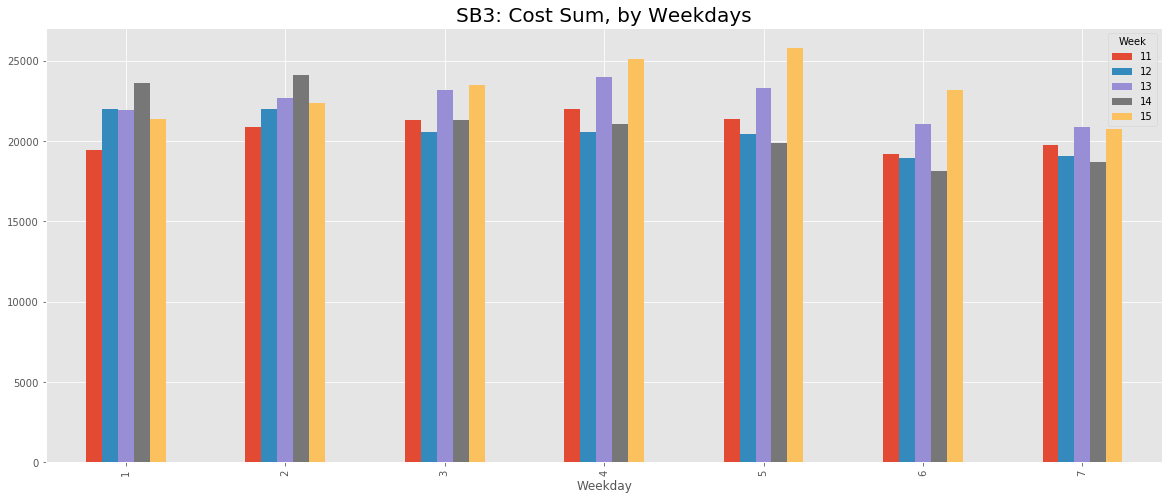

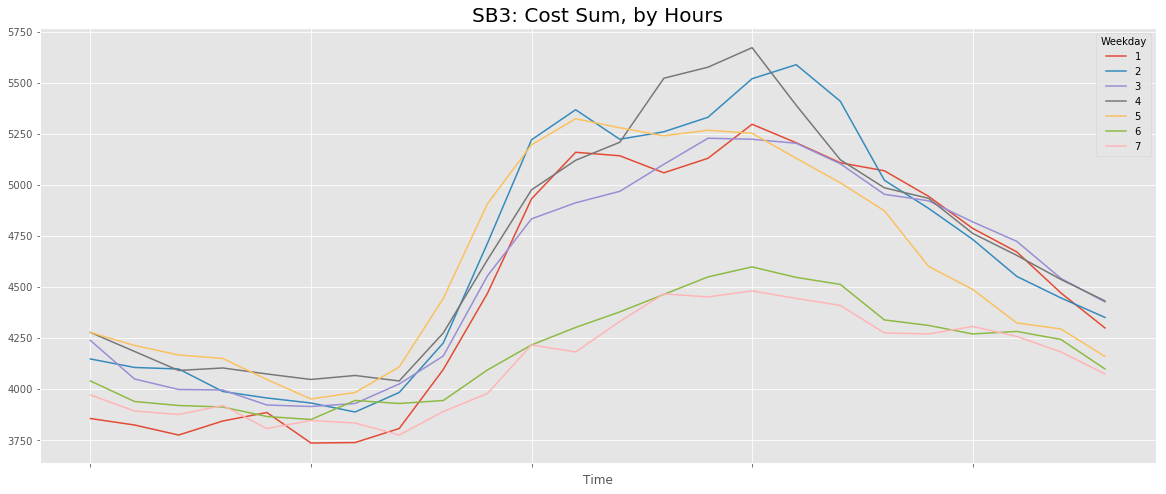

In [19]:
analysis(df)